- Author: Longfei Fan
- Date: 08/07/2017

In [1]:
import sys
sys.path.append('../master_eq')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from qutip import *
import master_eq

%matplotlib inline
%reload_ext autoreload
%autoreload 1
%aimport master_eq

## General Master Equation defined by ABC

Our task is to solve an ordinary differential equaiton of the following form, which is defined by three parameters.

\begin{equation}
\begin{aligned}
\dot{p_m} =&~ - G_m (m+1) p_m + G_{m-1} m p_{m-1} - L_m m p_m + L_{m+1} (m+1) p_{m+1} \\
        G_m =&~ A - B * (m+1)\\
        L_m =&~ C
\end{aligned}
\end{equation}

where the physical meaning of each parameter is
- A: gain
- B: saturation
- C: loss

During the numerical calculation, we will define the truncated Fock number $N_{max}$, i.e. Fock numbers used will be in $[0, N_max - 1]$.


In [3]:
# set paremeters
A = 1.2e-2
B = 1.2e-5
C = 1.0e-2
N_max = 600

# initialize the setup
eq = master_eq.MasterEq(A, B, C, N_max)

# set the initial state
eq.set_init_state(fock(N_max, 0))

In [4]:
# start evolve, i.e. sovle the ode and keep track of useful data
t_list = np.linspace(0, 8000, 201)
eq.pn_evolve(t_list)

2017-08-17 20:08:46.784445 START
2017-08-17 20:09:01.303795 FINISH


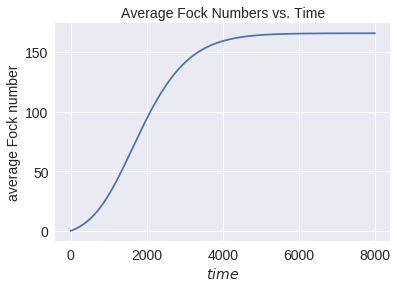

In [5]:
eq.plot_n_vs_time()

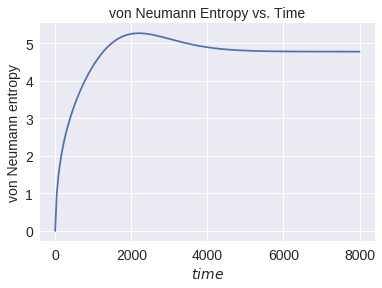

In [6]:
eq.plot_entropy_vs_time()

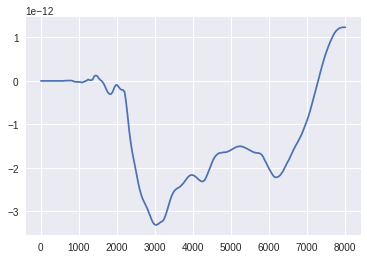

In [7]:
# check whether {p_m} always keeps normalized
norm_vs_t = np.array([sum(pn) for pn in eq.get_pns()])
plt.plot(t_list, norm_vs_t - 1);

### Master Equation of Laser defined by ABC

`LaserABC()` is almost the same with `MasterEq()`. The only one difference is that now

\begin{equation}
    G_m = \frac{A}{1 + (m + 1) B / A}
\end{equation}

In [8]:
A = 1.2e-2
B = 1.2e-5
C = 1.0e-2
N_max = 600

labc = master_eq.LaserABC(A, B, C, N_max)
labc.set_init_state(fock(N_max, 0))

In [9]:
t_list = np.linspace(0, 8000, 201)
labc.pn_evolve(t_list)

2017-08-17 20:09:01.795067 START
2017-08-17 20:09:16.114708 FINISH


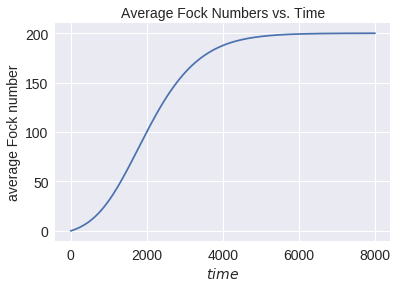

In [10]:
labc.plot_n_vs_time()

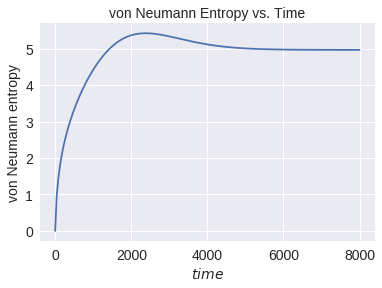

In [11]:
labc.plot_entropy_vs_time()

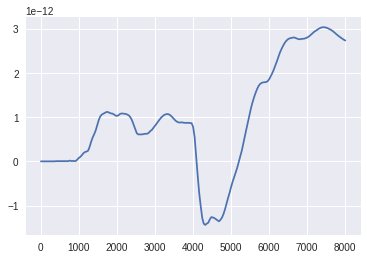

In [12]:
norm_vs_t = np.array([sum(pn) for pn in labc.get_pns()])
plt.plot(t_list, norm_vs_t - 1);

### Master Equation of Laser defined by Arguments

Now the A, B, and C are derived from cavity-field arguments. Others are the same with `LaserABC()`.

In [13]:
g = 0.001
ra = 0.24
gamma = 0.063246
kappa = 0.0001

N_max = 600

l = master_eq.Laser(g, ra, gamma, kappa, N_max)
l.set_init_state(fock(N_max, 0))

In [14]:
l.get_abc()

{'A': 0.00011999830454395509, 'B': 1.19996609111865e-07, 'C': 0.0001}

In [15]:
for key, item in l.get_abc().items():
    print(key, item)

A 0.00011999830454395509
B 1.19996609111865e-07
C 0.0001


In [16]:
# evolve
t_list = np.linspace(0, 800000, 101)
l.pn_evolve(t_list)

2017-08-17 20:09:16.547047 START
2017-08-17 20:09:31.077717 FINISH


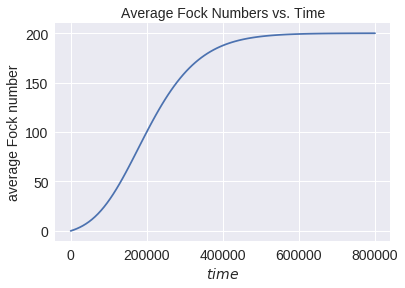

In [17]:
l.plot_n_vs_time()

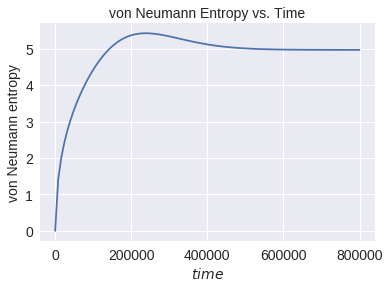

In [18]:
l.plot_entropy_vs_time()

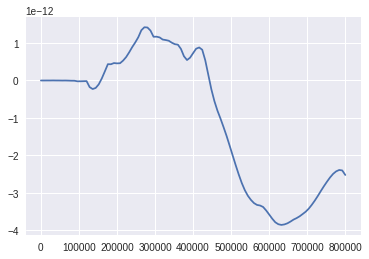

In [19]:
norm_vs_t = np.array([sum(pn) for pn in l.get_pns()])
plt.plot(t_list, norm_vs_t - 1);

### Master Equation of CNB I

A, B, and C are derived from CNB arguments. 

\begin{equation}
\begin{aligned}
    A =&~ \kappa N \\
    B =&~ \kappa \\
    C =&~ \kappa N \left(\frac{T}{T_c}\right)^3 \\
\end{aligned}
\end{equation}

where $\kappa$ is the rate constant. And

\begin{equation}
    L_m = C + \kappa (N - m) \eta,
\end{equation}


where $\eta$ is the cross excitation parameter. It is zero for CNB I.

In [20]:
NB = 1000
TTc = 0.94
rate = 1.2e-7
eta = 0

cnbi = master_eq.CNBoson(NB, TTc, rate, eta)
cnbi.set_init_state(fock(NB + 1, 0))

In [21]:
cnbi.get_abc()

{'A': 0.00012012, 'B': 1.2e-07, 'C': 9.967007999999998e-05}

In [22]:
t_list = np.linspace(0, 800000, 101)
cnbi.pn_evolve(t_list)

2017-08-17 20:09:31.497435 START
2017-08-17 20:10:06.341330 FINISH


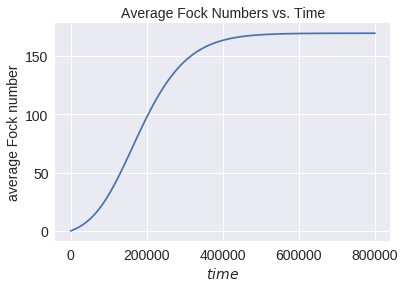

In [23]:
cnbi.plot_n_vs_time()

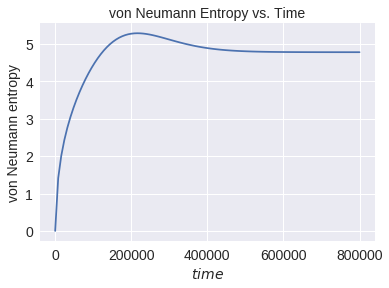

In [24]:
cnbi.plot_entropy_vs_time()

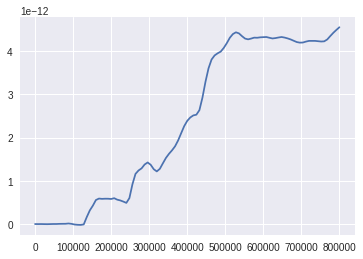

In [25]:
norm_vs_t = np.array([sum(pn) for pn in cnbi.get_pns()])
plt.plot(t_list, norm_vs_t - 1);

### Master Equation of CNB II

A, B, and C are derived from CNB arguments. Everthing is the same with CNB I except that the cross excitation parameter $\eta$ is positive.

In [26]:
NB = 1000
TTc = 0.94
rate = 1.2e-7
eta = 0.368

cnbii = master_eq.CNBoson(NB, TTc, rate, eta)
cnbii.set_init_state(fock(NB + 1, 0))

In [27]:
cnbii.get_abc()

{'A': 0.00016432416, 'B': 1.6415999999999998e-07, 'C': 9.967007999999998e-05}

In [28]:
t_list = np.linspace(0, 800000, 101)
cnbii.pn_evolve(t_list)

2017-08-17 20:10:06.736187 START
2017-08-17 20:10:42.669723 FINISH


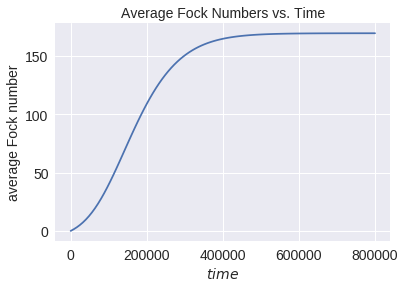

In [29]:
cnbii.plot_n_vs_time()

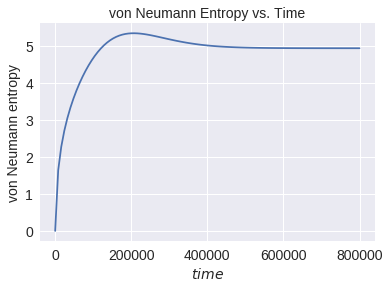

In [30]:
cnbii.plot_entropy_vs_time()

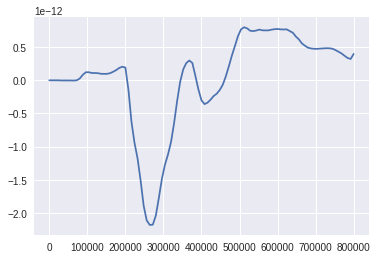

In [31]:
norm_vs_t = np.array([sum(pn) for pn in cnbii.get_pns()])
plt.plot(t_list, norm_vs_t - 1);